In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot


In [7]:
# load data
df = pd.read_csv("heart.csv")
df.head()

y = df['target']
X = df.drop(['target'], axis = 1)
  
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)

In [12]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
X.shape

(1025, 13)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

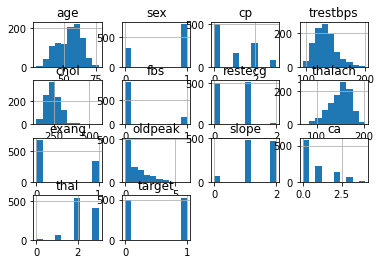

In [8]:
df.hist()

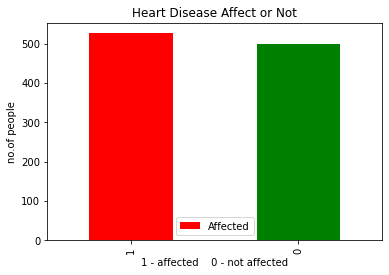

In [11]:
df["target"].value_counts().plot(kind = "bar", color = ["red","green"]);
plt.title("Heart Disease Affect or Not")
plt.xlabel("1 - affected    0 - not affected")
plt.ylabel("no.of people")
plt.legend(["Affected","Not affected"]);

In [64]:
df.sex[df.target == 1].value_counts()

1    300
0    226
Name: sex, dtype: int64

In [65]:
df.sex[df.target == 0].value_counts()

1    413
0     86
Name: sex, dtype: int64

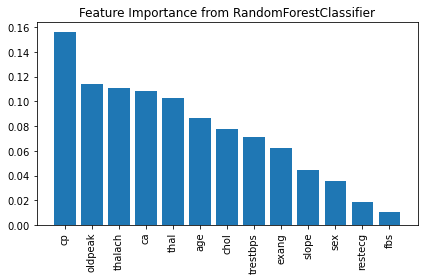

In [2]:
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_

sorted_indices = np.argsort(importance)[::-1]

import matplotlib.pyplot as plt
 
plt.title('Feature Importance from RandomForestClassifier')
plt.bar(range(X_train.shape[1]), importance[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [31]:
# feature selection
def select_features(X_train, y_train, X_test, number):
    # configure to select a subset of features
    number_features = number
    fs = SelectFromModel(RandomForestClassifier(), max_features=number_features)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
accuracies_rf = [] 
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
# feature selection
for number_features in range(1,14):
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, number_features)
    # fit the model
    model = RandomForestClassifier()
    model.fit(X_train_fs, y_train)
    # evaluate the model
    yhat = model.predict(X_test_fs)
    # evaluate predictions
    accuracy = accuracy_score(y_test, yhat)
    accuracies_rf.append(accuracy)
    print(f'number_features: {number_features} Data shape:{X_test_fs.shape} Accuracy: {accuracy*100}')

number_features: 1 Data shape:(257, 1) Accuracy: 69.64980544747081
number_features: 2 Data shape:(257, 2) Accuracy: 78.98832684824903
number_features: 3 Data shape:(257, 3) Accuracy: 90.27237354085604
number_features: 4 Data shape:(257, 4) Accuracy: 95.71984435797665
number_features: 5 Data shape:(257, 5) Accuracy: 99.22178988326849
number_features: 6 Data shape:(257, 6) Accuracy: 100.0
number_features: 7 Data shape:(257, 7) Accuracy: 100.0
number_features: 8 Data shape:(257, 7) Accuracy: 100.0
number_features: 9 Data shape:(257, 7) Accuracy: 100.0
number_features: 10 Data shape:(257, 7) Accuracy: 100.0
number_features: 11 Data shape:(257, 6) Accuracy: 100.0
number_features: 12 Data shape:(257, 7) Accuracy: 100.0
number_features: 13 Data shape:(257, 7) Accuracy: 100.0


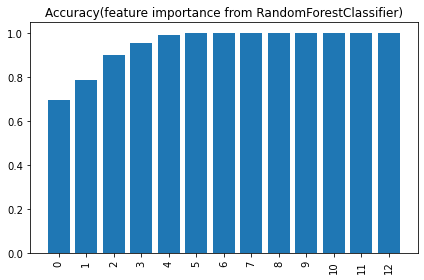

In [32]:
plt.title('Accuracy(feature importance from RandomForestClassifier)')
plt.bar(range(X_train.shape[1]), accuracies_rf, align='center')
plt.xticks(range(X_train.shape[1]), rotation=90)
plt.tight_layout()
plt.show()

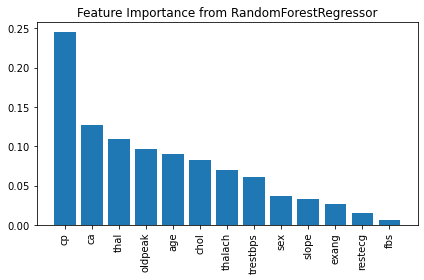

In [57]:
from sklearn.ensemble import RandomForestRegressor
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_

sorted_indices = np.argsort(importance)[::-1]

import matplotlib.pyplot as plt
 
plt.title('Feature Importance from RandomForestRegressor')
plt.bar(range(X_train.shape[1]), importance[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [29]:
# feature selection
def select_features(X_train, y_train, X_test, number):
    # configure to select a subset of features
    number_features = number
    fs = SelectFromModel(RandomForestRegressor(), max_features=number_features)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
accuracies_rfr = [] 
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
# feature selection
for number_features in range(1,14):
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, number_features)
    # fit the model
    model = RandomForestClassifier()
    model.fit(X_train_fs, y_train)
    # evaluate the model
    yhat = model.predict(X_test_fs)
    # evaluate predictions
    accuracy = accuracy_score(y_test, yhat)
    accuracies_rfr.append(accuracy)
    print(f'number_features: {number_features} Data shape:{X_test_fs.shape} Accuracy: {accuracy*100}')

number_features: 1 Data shape:(257, 1) Accuracy: 76.26459143968872
number_features: 2 Data shape:(257, 2) Accuracy: 76.26459143968872
number_features: 3 Data shape:(257, 3) Accuracy: 85.21400778210116
number_features: 4 Data shape:(257, 4) Accuracy: 91.43968871595331
number_features: 5 Data shape:(257, 5) Accuracy: 98.83268482490273
number_features: 6 Data shape:(257, 6) Accuracy: 100.0
number_features: 7 Data shape:(257, 7) Accuracy: 100.0
number_features: 8 Data shape:(257, 7) Accuracy: 100.0
number_features: 9 Data shape:(257, 7) Accuracy: 100.0
number_features: 10 Data shape:(257, 7) Accuracy: 100.0
number_features: 11 Data shape:(257, 6) Accuracy: 100.0
number_features: 12 Data shape:(257, 7) Accuracy: 100.0
number_features: 13 Data shape:(257, 6) Accuracy: 100.0


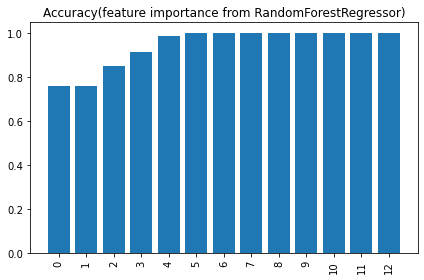

In [41]:
plt.title('Accuracy(feature importance from RandomForestRegressor)')
plt.bar(range(X_train.shape[1]), accuracies_rfr, align='center')
plt.xticks(range(X_train.shape[1]), rotation=90)
plt.tight_layout()
plt.show()

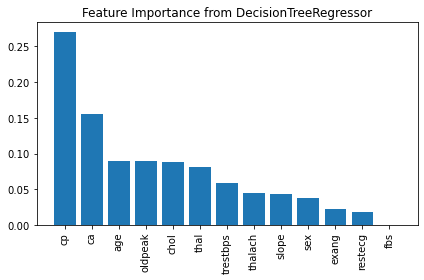

In [40]:
from sklearn.tree import DecisionTreeRegressor
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_

sorted_indices = np.argsort(importance)[::-1]

import matplotlib.pyplot as plt
 
plt.title('Feature Importance from DecisionTreeRegressor')
plt.bar(range(X_train.shape[1]), importance[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [38]:
# feature selection
def select_features(X_train, y_train, X_test, number):
    # configure to select a subset of features
    number_features = number
    fs = SelectFromModel(DecisionTreeRegressor(), max_features=number_features)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
accuracies_dtr = [] 
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
# feature selection
for number_features in range(1,14):
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, number_features)
    # fit the model
    model = RandomForestClassifier()
    model.fit(X_train_fs, y_train)
    # evaluate the model
    yhat = model.predict(X_test_fs)
    # evaluate predictions
    accuracy = accuracy_score(y_test, yhat)
    accuracies_dtr.append(accuracy)
    print(f'number_features: {number_features} Data shape:{X_test_fs.shape} Accuracy: {accuracy*100}')

number_features: 1 Data shape:(257, 1) Accuracy: 76.26459143968872
number_features: 2 Data shape:(257, 2) Accuracy: 87.15953307392996
number_features: 3 Data shape:(257, 3) Accuracy: 95.71984435797665
number_features: 4 Data shape:(257, 4) Accuracy: 98.83268482490273
number_features: 5 Data shape:(257, 5) Accuracy: 100.0
number_features: 6 Data shape:(257, 5) Accuracy: 100.0
number_features: 7 Data shape:(257, 5) Accuracy: 100.0
number_features: 8 Data shape:(257, 5) Accuracy: 100.0
number_features: 9 Data shape:(257, 5) Accuracy: 100.0
number_features: 10 Data shape:(257, 6) Accuracy: 100.0
number_features: 11 Data shape:(257, 5) Accuracy: 100.0
number_features: 12 Data shape:(257, 5) Accuracy: 100.0
number_features: 13 Data shape:(257, 5) Accuracy: 100.0


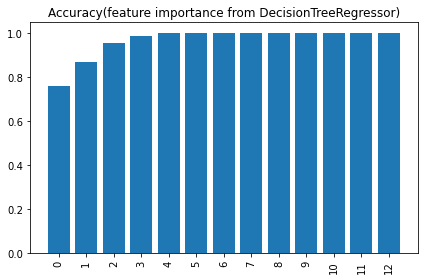

In [39]:
plt.title('Accuracy(feature importance from DecisionTreeRegressor)')
plt.bar(range(X_train.shape[1]), accuracies_dtr, align='center')
plt.xticks(range(X_train.shape[1]), rotation=90)
plt.tight_layout()
plt.show()

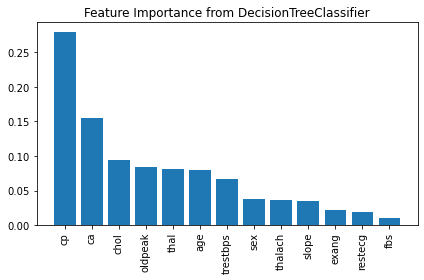

In [54]:
from sklearn.tree import DecisionTreeClassifier
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_

sorted_indices = np.argsort(importance)[::-1]

import matplotlib.pyplot as plt
 
plt.title('Feature Importance from DecisionTreeClassifier')
plt.bar(range(X_train.shape[1]), importance[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [55]:
# feature selection
def select_features(X_train, y_train, X_test, number):
    # configure to select a subset of features
    number_features = number
    fs = SelectFromModel(DecisionTreeClassifier(), max_features=number_features)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
accuracies_dtc = [] 
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
# feature selection
for number_features in range(1,14):
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, number_features)
    # fit the model
    model = RandomForestClassifier()
    model.fit(X_train_fs, y_train)
    # evaluate the model
    yhat = model.predict(X_test_fs)
    # evaluate predictions
    accuracy = accuracy_score(y_test, yhat)
    accuracies_dtc.append(accuracy)
    print(f'number_features: {number_features} Data shape:{X_test_fs.shape} Accuracy: {accuracy*100}')

number_features: 1 Data shape:(257, 1) Accuracy: 76.26459143968872
number_features: 2 Data shape:(257, 2) Accuracy: 86.7704280155642
number_features: 3 Data shape:(257, 3) Accuracy: 95.71984435797665
number_features: 4 Data shape:(257, 4) Accuracy: 98.83268482490273
number_features: 5 Data shape:(257, 5) Accuracy: 100.0
number_features: 6 Data shape:(257, 5) Accuracy: 100.0
number_features: 7 Data shape:(257, 5) Accuracy: 100.0
number_features: 8 Data shape:(257, 5) Accuracy: 100.0
number_features: 9 Data shape:(257, 5) Accuracy: 100.0
number_features: 10 Data shape:(257, 5) Accuracy: 100.0
number_features: 11 Data shape:(257, 6) Accuracy: 100.0
number_features: 12 Data shape:(257, 6) Accuracy: 100.0
number_features: 13 Data shape:(257, 5) Accuracy: 100.0


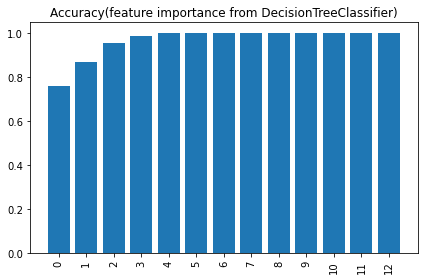

In [56]:
plt.title('Accuracy(feature importance from DecisionTreeClassifier)')
plt.bar(range(X_train.shape[1]), accuracies_dtc, align='center')
plt.xticks(range(X_train.shape[1]), rotation=90)
plt.tight_layout()
plt.show()

Feature: 0, Score: -0.00143
Feature: 1, Score: -0.21072
Feature: 2, Score: 0.11182
Feature: 3, Score: -0.00182
Feature: 4, Score: -0.00046
Feature: 5, Score: 0.00422
Feature: 6, Score: 0.04431
Feature: 7, Score: 0.00288
Feature: 8, Score: -0.14464
Feature: 9, Score: -0.06102
Feature: 10, Score: 0.07622
Feature: 11, Score: -0.09561
Feature: 12, Score: -0.11524


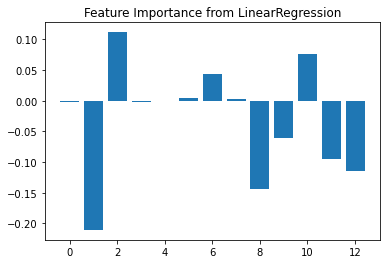

In [59]:
# linear regression feature importance

from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset

# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.title('Feature Importance from LinearRegression')
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [45]:
# feature selection
def select_features(X_train, y_train, X_test, number):
    # configure to select a subset of features
    number_features = number
    fs = SelectFromModel(LinearRegression(), max_features=number_features)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
accuracies_lr = [] 
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
# feature selection
for number_features in range(1,14):
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, number_features)
    # fit the model
    model = RandomForestClassifier()
    model.fit(X_train_fs, y_train)
    # evaluate the model
    yhat = model.predict(X_test_fs)
    # evaluate predictions
    accuracy = accuracy_score(y_test, yhat)
    accuracies_lr.append(accuracy)
    print(f'number_features: {number_features} Data shape:{X_test_fs.shape} Accuracy: {accuracy*100}')

number_features: 1 Data shape:(257, 1) Accuracy: 63.035019455252915
number_features: 2 Data shape:(257, 2) Accuracy: 68.09338521400778
number_features: 3 Data shape:(257, 3) Accuracy: 74.70817120622569
number_features: 4 Data shape:(257, 4) Accuracy: 81.71206225680933
number_features: 5 Data shape:(257, 5) Accuracy: 84.43579766536965
number_features: 6 Data shape:(257, 6) Accuracy: 86.7704280155642
number_features: 7 Data shape:(257, 7) Accuracy: 87.54863813229572
number_features: 8 Data shape:(257, 7) Accuracy: 87.54863813229572
number_features: 9 Data shape:(257, 7) Accuracy: 87.93774319066148
number_features: 10 Data shape:(257, 7) Accuracy: 87.93774319066148
number_features: 11 Data shape:(257, 7) Accuracy: 87.93774319066148
number_features: 12 Data shape:(257, 7) Accuracy: 87.93774319066148
number_features: 13 Data shape:(257, 7) Accuracy: 87.54863813229572


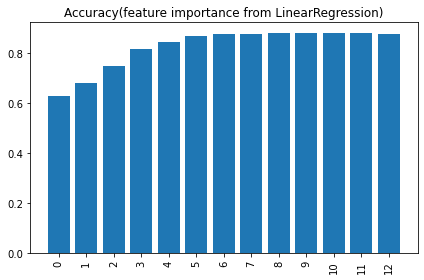

In [48]:
plt.title('Accuracy(feature importance from LinearRegression)')
plt.bar(range(X_train.shape[1]), accuracies_lr, align='center')
plt.xticks(range(X_train.shape[1]),rotation=90)
plt.tight_layout()
plt.show()

Feature: 0, Score: 0.01132
Feature: 1, Score: -1.53606
Feature: 2, Score: 0.86119
Feature: 3, Score: -0.01414
Feature: 4, Score: -0.00419
Feature: 5, Score: -0.18747
Feature: 6, Score: 0.55827
Feature: 7, Score: 0.03126
Feature: 8, Score: -0.86723
Feature: 9, Score: -0.53645
Feature: 10, Score: 0.53768
Feature: 11, Score: -0.71708
Feature: 12, Score: -0.85466


C:\Users\gordo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


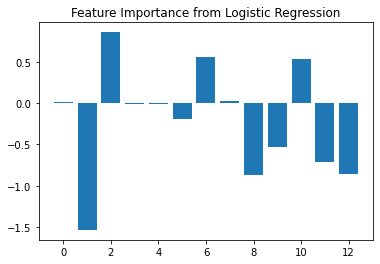

In [60]:
# logistic regression for feature importance

from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.title('Feature Importance from Logistic Regression')
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [50]:
# feature selection
def select_features(X_train, y_train, X_test, number):
    # configure to select a subset of features
    number_features = number
    fs = SelectFromModel(LogisticRegression(), max_features=number_features)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
accuracies_lgr = [] 
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
# feature selection
for number_features in range(1,14):
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, number_features)
    # fit the model
    model = RandomForestClassifier()
    model.fit(X_train_fs, y_train)
    # evaluate the model
    yhat = model.predict(X_test_fs)
    # evaluate predictions
    accuracy = accuracy_score(y_test, yhat)
    accuracies_lgr.append(accuracy)
    print(f'number_features: {number_features} Data shape:{X_test_fs.shape} Accuracy: {accuracy*100}')

C:\Users\gordo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gordo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

number_features: 1 Data shape:(257, 1) Accuracy: 63.035019455252915
number_features: 2 Data shape:(257, 2) Accuracy: 68.09338521400778


C:\Users\gordo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gordo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

number_features: 3 Data shape:(257, 3) Accuracy: 78.59922178988327
number_features: 4 Data shape:(257, 4) Accuracy: 81.71206225680933


C:\Users\gordo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gordo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

number_features: 5 Data shape:(257, 5) Accuracy: 81.71206225680933
number_features: 6 Data shape:(257, 6) Accuracy: 85.99221789883269


C:\Users\gordo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gordo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

number_features: 7 Data shape:(257, 7) Accuracy: 96.10894941634241
number_features: 8 Data shape:(257, 7) Accuracy: 96.10894941634241


C:\Users\gordo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gordo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

number_features: 9 Data shape:(257, 7) Accuracy: 96.10894941634241
number_features: 10 Data shape:(257, 7) Accuracy: 96.10894941634241


C:\Users\gordo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gordo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

number_features: 11 Data shape:(257, 7) Accuracy: 96.10894941634241
number_features: 12 Data shape:(257, 7) Accuracy: 96.10894941634241
number_features: 13 Data shape:(257, 7) Accuracy: 96.49805447470817


C:\Users\gordo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


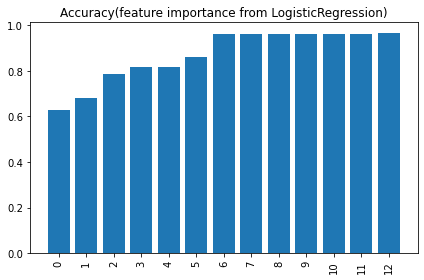

In [52]:
plt.title('Accuracy(feature importance from LogisticRegression)')
plt.bar(range(X_train.shape[1]), accuracies_lgr, align='center')
plt.xticks(range(X_train.shape[1]),rotation=90)
plt.tight_layout()
plt.show()